# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №1

## №1 (20 баллов)

- Задача минимизации для множественной регресии выглядит вот так:
$$(Y - X\hat{\beta})'(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}}$$
- Решите эту задачу минимизации и выведите формулу для оценок коэффициентов $\hat{\beta}$

Дифференцируем:

$$\dfrac{\partial}{\partial\hat{\beta}} (Y - X \hat{\beta})' (Y - X \hat{\beta}) = -2 (Y - X \hat{\beta})$$

Приравняем к нулю:

$$Y = X \hat{\beta}$$

Домножим слева на $X^{-1}$:

$$\hat{\beta} = X^{-1} Y$$

## №2 (40 баллов)

![image.png](attachment:image.png)

- У нас есть следующий датасет (`HW_001_001.csv`)
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - `make` - марка и модель автомобиля
    - `price` - цена
    - `mpg` - пробег
    - `rep78` - кол-во записей о ремонте к 1978 г.
    - `headroom` - габаритная высота
    - `trunk` - размер багажника
    - `weight` - вес
    - `length` - длина
    - `turn` - радиус разворота
    - `displacement` - объем двигателя
    - `gear_ratio` - передаточное число
    - `foreing` - происхождение автомобиля

In [ ]:
import pandas as pd
df_matrix = pd.read_csv('data.csv')

- Во-первых, посмотрите на описательные статистики

In [ ]:
pd.set_option('display.max_rows', None)
df_matrix = pd.read_csv('data.csv')
print(df_matrix.sort_values(by=['price']))

                 make  price  mpg  ...  displacement  gear_ratio   foreign
33       Merc. Zephyr   3291   20  ...           140        3.08  Domestic
13     Chev. Chevette   3299   29  ...           231        2.93  Domestic
17        Chev. Monza   3667   24  ...           151        2.73  Domestic
67     Toyota Corolla   3748   31  ...            97        3.21   Foreign
65             Subaru   3798   35  ...            97        3.81   Foreign
2          AMC Spirit   3799   22  ...           121        3.08  Domestic
28       Merc. Bobcat   3829   22  ...           140        2.73  Domestic
64     Renault Le Car   3895   26  ...            79        3.72   Foreign
18         Chev. Nova   3955   19  ...           250        2.56  Domestic
19         Dodge Colt   3984   30  ...            98        3.54  Domestic
62          Mazda GLC   3995   30  ...            86        3.73   Foreign
20     Dodge Diplomat   4010   18  ...           318        2.47  Domestic
45       Plym. Volare   4

In [ ]:
df_matrix.columns

Index(['make', 'price', 'mpg', 'rep78', 'headroom', 'trunk', 'weight',
       'length', 'turn', 'displacement', 'gear_ratio', 'foreign'],
      dtype='object')

In [ ]:
df_matrix.describe()

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio
count,74.000000,74.000000,69.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,6165.256757,21.297297,3.405797,2.993243,13.756757,3019.459459,187.932432,39.648649,197.297297,3.014865
std,2949.495885,5.785503,0.989932,0.845995,4.277404,777.193567,22.266340,4.399354,91.837219,0.456287
min,3291.000000,12.000000,1.000000,1.500000,5.000000,1760.000000,142.000000,31.000000,79.000000,2.190000
25%,4220.250000,18.000000,3.000000,2.500000,10.250000,2250.000000,170.000000,36.000000,119.000000,2.730000
50%,5006.500000,20.000000,3.000000,3.000000,14.000000,3190.000000,192.500000,40.000000,196.000000,2.955000
75%,6332.250000,24.750000,4.000000,3.500000,16.750000,3600.000000,203.750000,43.000000,245.250000,3.352500
max,15906.000000,41.000000,5.000000,5.000000,23.000000,4840.000000,233.000000,51.000000,425.000000,3.890000


In [ ]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          74 non-null     object 
 1   price         74 non-null     int64  
 2   mpg           74 non-null     int64  
 3   rep78         69 non-null     float64
 4   headroom      74 non-null     float64
 5   trunk         74 non-null     int64  
 6   weight        74 non-null     int64  
 7   length        74 non-null     int64  
 8   turn          74 non-null     int64  
 9   displacement  74 non-null     int64  
 10  gear_ratio    74 non-null     float64
 11  foreign       74 non-null     object 
dtypes: float64(3), int64(7), object(2)
memory usage: 7.1+ KB


- Какие выводы вы можете сделать?

Как минимум, датасет собран в Америке. А ещё чем дороже машина, тем она быстрей, но не всегда.

- Во-вторых, надо бы нарисовать что-нибудь
- С какой переменной вы бы начали? Какой график бы использовали?
- Нарисуйте 

Пойдём по классике и нарисуем сразу все переменные попарно.

In [ ]:
# Самый простой способ сделать heatmap - взять из библиотеки seaborn
import seaborn as sns

In [ ]:
df_matrix.dtypes

make             object
price             int64
mpg               int64
rep78           float64
headroom        float64
trunk             int64
weight            int64
length            int64
turn              int64
displacement      int64
gear_ratio      float64
foreign          object
dtype: object

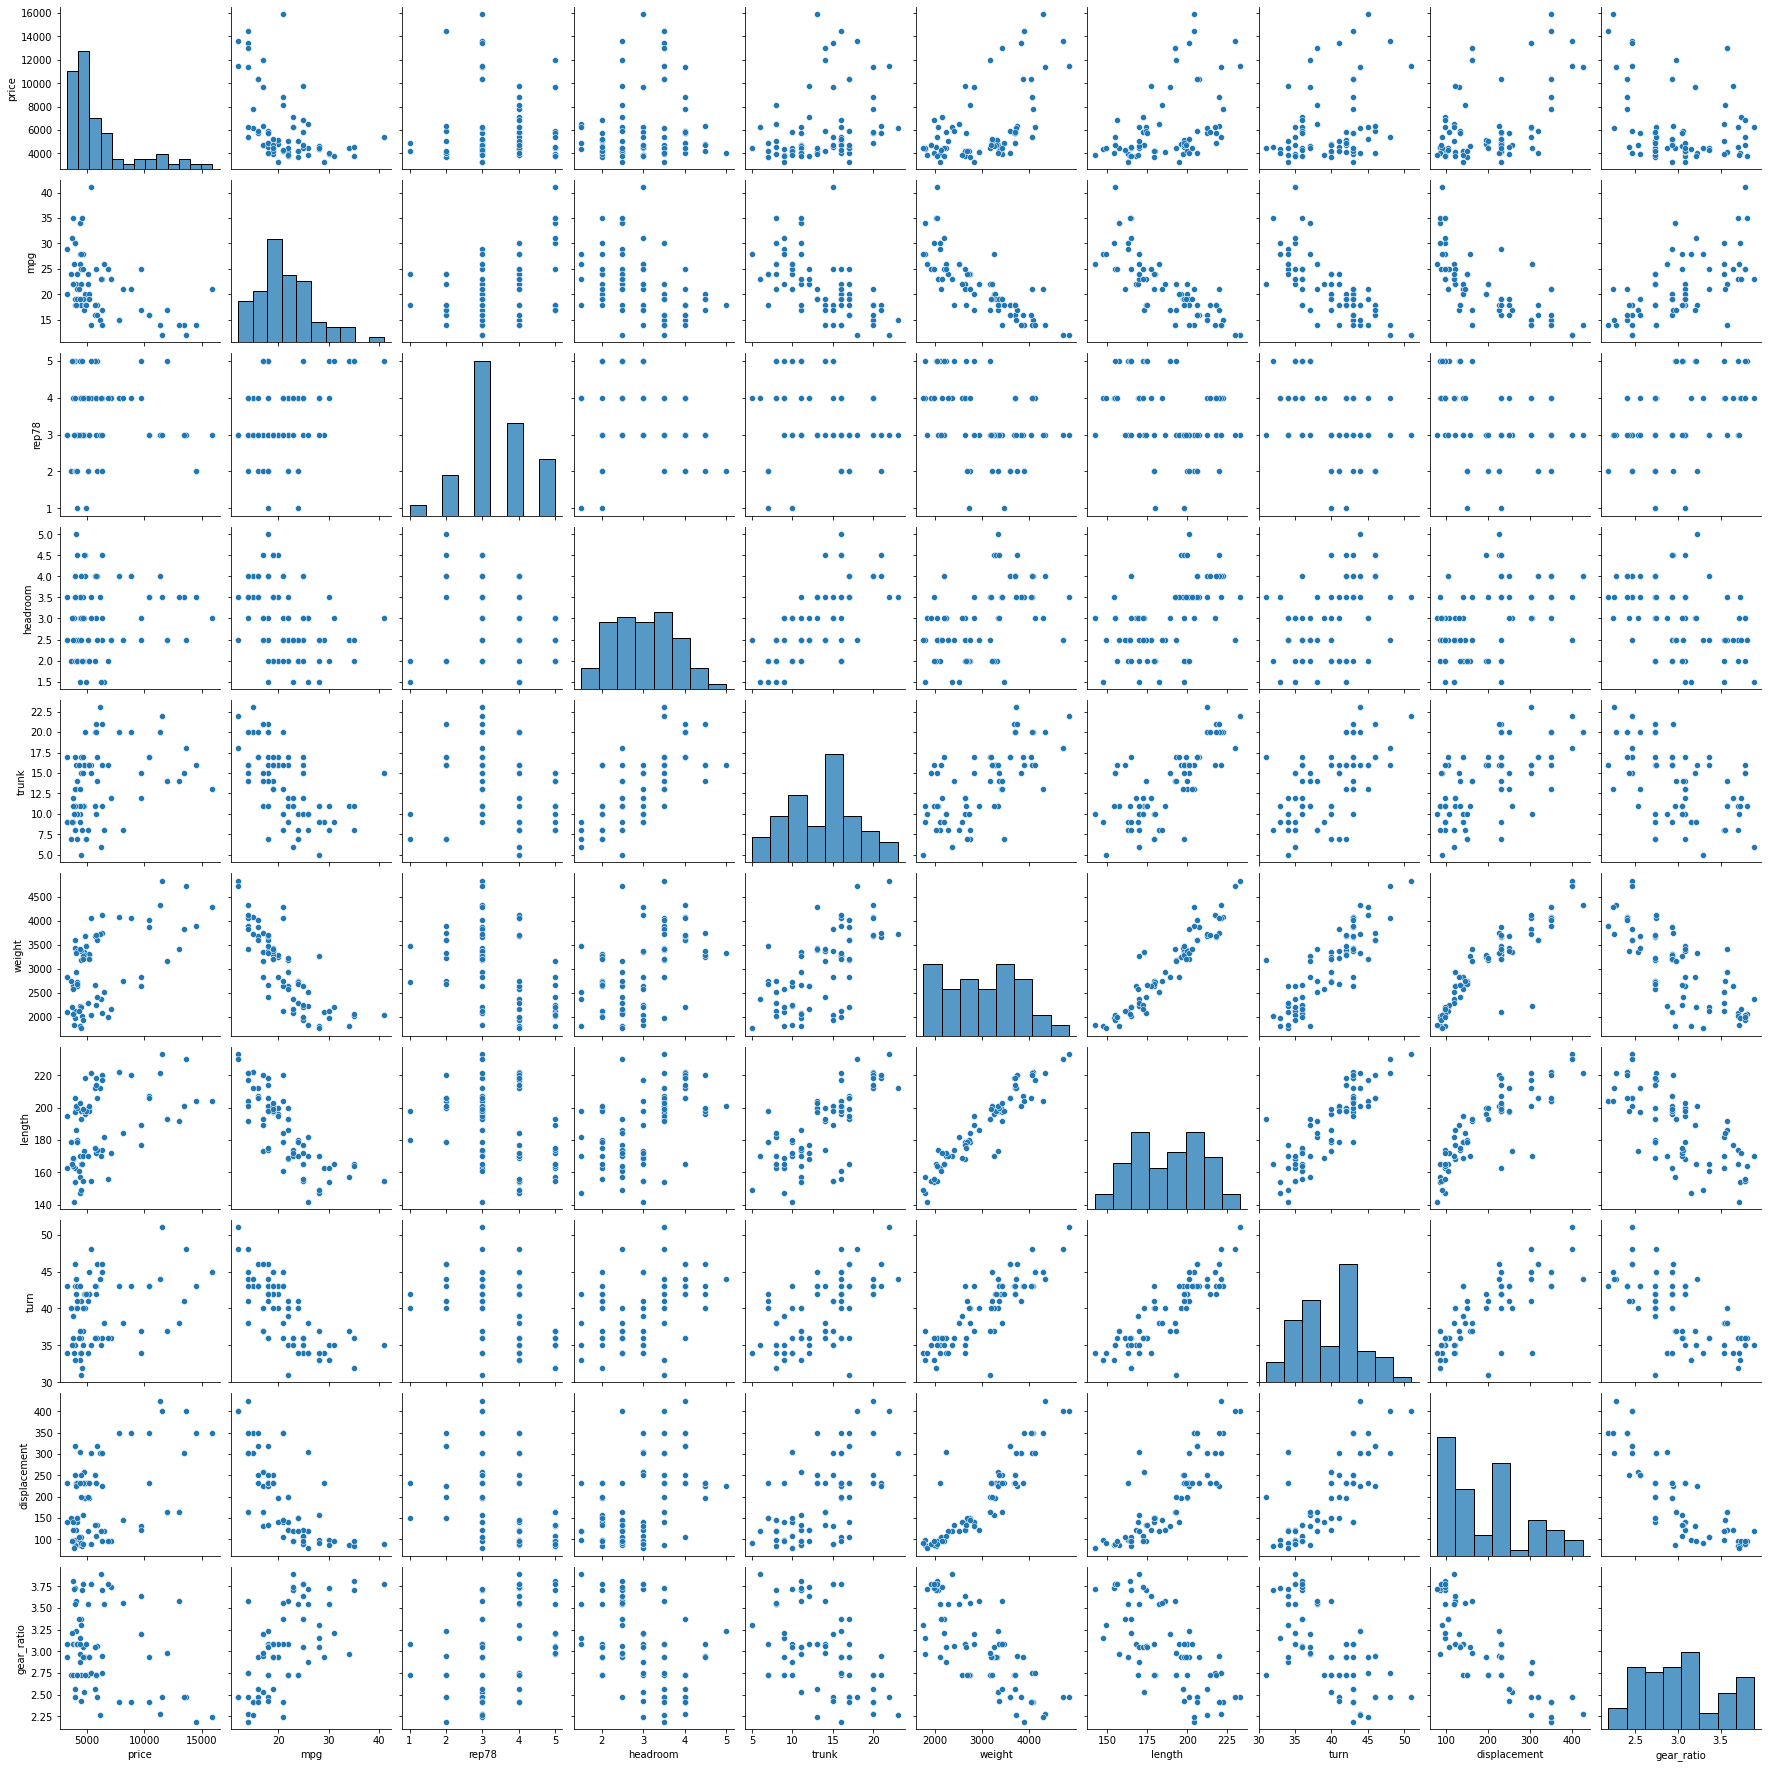

In [ ]:
sns.pairplot(df_matrix.select_dtypes(exclude=['object']))

- Какой вывод вы можете сделать?

Ну, на первый взгляд ловится несколько логарифмических зависимостей. Кроме этого есть пара категорийных признаков.

- Теперь посмотрим на, так называемый, `heatmap`. Если простыми словами, то это просто красивая корреляционная матрица

In [ ]:
from sklearn import preprocessing

x = df_matrix.select_dtypes(exclude=['object']).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
df.index = df_matrix.index
df.columns = df_matrix.select_dtypes(exclude='object').columns

In [ ]:
df.set_index('headroom').groupby(level=0).mean()

,price,mpg,rep78,trunk,weight,length,turn,displacement,gear_ratio
headroom,,,,,,,,,
0.000000,0.175862,0.405172,0.500000,0.138889,0.253247,0.354396,0.300000,0.181358,0.720588
0.142857,0.121431,0.405836,0.538462,0.371795,0.325175,0.421809,0.411538,0.220987,0.517647
0.285714,0.261639,0.403941,0.732143,0.357143,0.240028,0.365777,0.292857,0.186210,0.671429
0.428571,0.207311,0.395225,0.750000,0.405983,0.319181,0.364328,0.338462,0.287016,0.493213
0.571429,0.340066,0.190805,0.519231,0.614815,0.578355,0.649817,0.536667,0.497881,0.368627
0.714286,0.251090,0.203448,0.575000,0.788889,0.617532,0.749451,0.590000,0.583526,0.250588
0.857143,0.136901,0.232759,0.437500,0.652778,0.537338,0.675824,0.587500,0.409682,0.458824
1.000000,0.060959,0.206897,0.250000,0.611111,0.509740,0.648352,0.650000,0.421965,0.611765


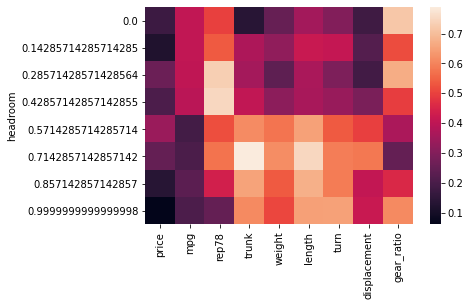

In [ ]:
sns.heatmap(df.set_index('headroom').groupby(level=0).mean())

- Какой вывод можно сделать?

Можно сделать вывод о том, что я выбрал не ту переменную (headroom) и просто так продолбал полчаса.
Кажется, надо тупо сделать хитмап "цена -- всё остальное". Ну, этим и займёмся.

In [ ]:
x = df_matrix.select_dtypes(exclude='object').values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = df_matrix.select_dtypes(exclude='object').columns
df['price'] = df_matrix['price']

In [ ]:
df = df.set_index('price')

In [ ]:
df.index = df.index.to_series().apply(lambda x: round(x, -3))

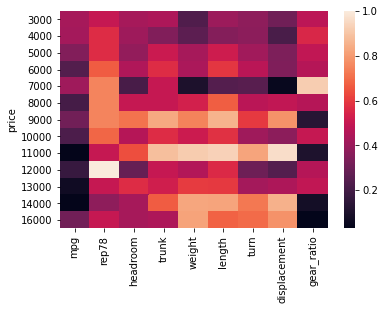

In [ ]:
sns.heatmap(df.groupby(level=0).mean())

- Подумайте над гипотезами о взаимосвязи между зависимой переменной и регрессорами (как переменная X *может влиять* на Y)
- Преобразуйте переменные, если необходимо
- Постройте первую версию модели

Прикольно, что цена окололинейно зависит от веса

In [ ]:
df_matrix.rep78 = df_matrix.rep78.fillna(0)

In [ ]:
import statsmodels.api as sm
import numpy as np

Y = df_matrix['price']
X = df_matrix.drop(['price', 'make', 'foreign'], axis=1)
X['const'] = 1

res = sm.OLS(endog=Y, exog=X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     7.033
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           5.42e-07
Time:                        11:42:02   Log-Likelihood:                -670.27
No. Observations:                  74   AIC:                             1361.
Df Residuals:                      64   BIC:                             1384.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
mpg           -127.9877     79.277     -1.614      0.111    -286.361      30.386
rep78          337.6756    223.516      1.511      0.136    -108.850     784.201
headroom      -745.8565    417.580     -1.786      0.079   -1580.068      88.355
trunk           68.7739    105.182      0.654      0.516    -141.351     278.899
weight           4.7661      1.351      3.527      0.001       2.066       7.466
length         -81.9878     42.088     -1.948      0.056    -166.069       2.093
turn          -284.9762    123.986     -2.298      0.025    -532.666     -37.287
displacement    13.8765      7.603      1.825      0.073      -1.313      29.066
gear_ratio    2409.5624   1038.176      2.321      0.023     335.567    4483.558
const         1.142e+04   7037.872      1.622      0.110   -2640.835    2.55e+04
==============================================================================
Omnibus:                        9.052   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.697
Skew:                           0.732   Prob(JB):                       0.0129
Kurtosis:                       3.824   Cond. No.                     8.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Значима ли регрессия в целом?
- Все ли переменные значимы? Если нет, то, какие ваши дальнейшие шаги?

Всё очень ужасно, ето просто капец.

Предлагаю отнормировать всё кроме цены и вообще использовать логистическую регрессию, потому что визуально зависимости не везде линейные. Кстати, пока можно сделать логарифмические преобразования некоторых переменных, некоторые выкинуть, посмотреть на остатки, чтобы понять, вдруг там гетероскедастичность и вообще кто в XXI веке использует линейные модели кроме сбера........

- Какой у вас получился $R^2, R^2_{adj}, AIC, BIC$?
- Попробуйте улучшить их

А чё, правда переписывать надо? Оо

Ну щас сделаю, ладно

In [ ]:
print(res.rsquared, res.rsquared_adj, res.aic, res.bic)

0.4972441305931805 0.42654408645784647 1360.5395951887822 1383.5802461208239


Щас будем пытаться улучшать

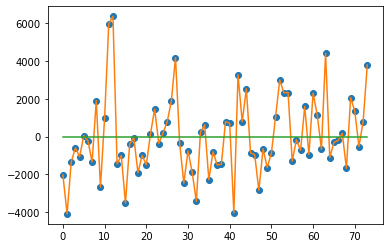

In [ ]:
from matplotlib import pyplot as plt

plt.plot(res.resid, 'o', linestyle='')
plt.plot([(i, 0) for i in res.resid])
plt.show()

выгледид как логорифм

In [ ]:
X_new = X.drop(['rep78', 'headroom', 'trunk'], axis=1)
Y_lg = np.log(Y)

res_new = sm.OLS(endog=Y, exog=X_new).fit()
res_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     9.166
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           2.55e-07
Time:                        12:08:19   Log-Likelihood:                -673.54
No. Observations:                  74   AIC:                             1361.
Df Residuals:                      67   BIC:                             1377.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
mpg           -105.9325     79.626     -1.330      0.188    -264.867      53.002
weight           4.9551      1.373      3.609      0.001       2.214       7.696
length         -80.9532     39.851     -2.031      0.046    -160.495      -1.411
turn          -303.0926    125.364     -2.418      0.018    -553.321     -52.864
displacement    10.5783      7.624      1.387      0.170      -4.640      25.796
gear_ratio    2245.6422   1057.876      2.123      0.037     134.114    4357.171
const         1.183e+04   7054.278      1.677      0.098   -2247.243    2.59e+04
==============================================================================
Omnibus:                        5.963   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.231
Skew:                           0.621   Prob(JB):                       0.0731
Kurtosis:                       3.391   Cond. No.                     8.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

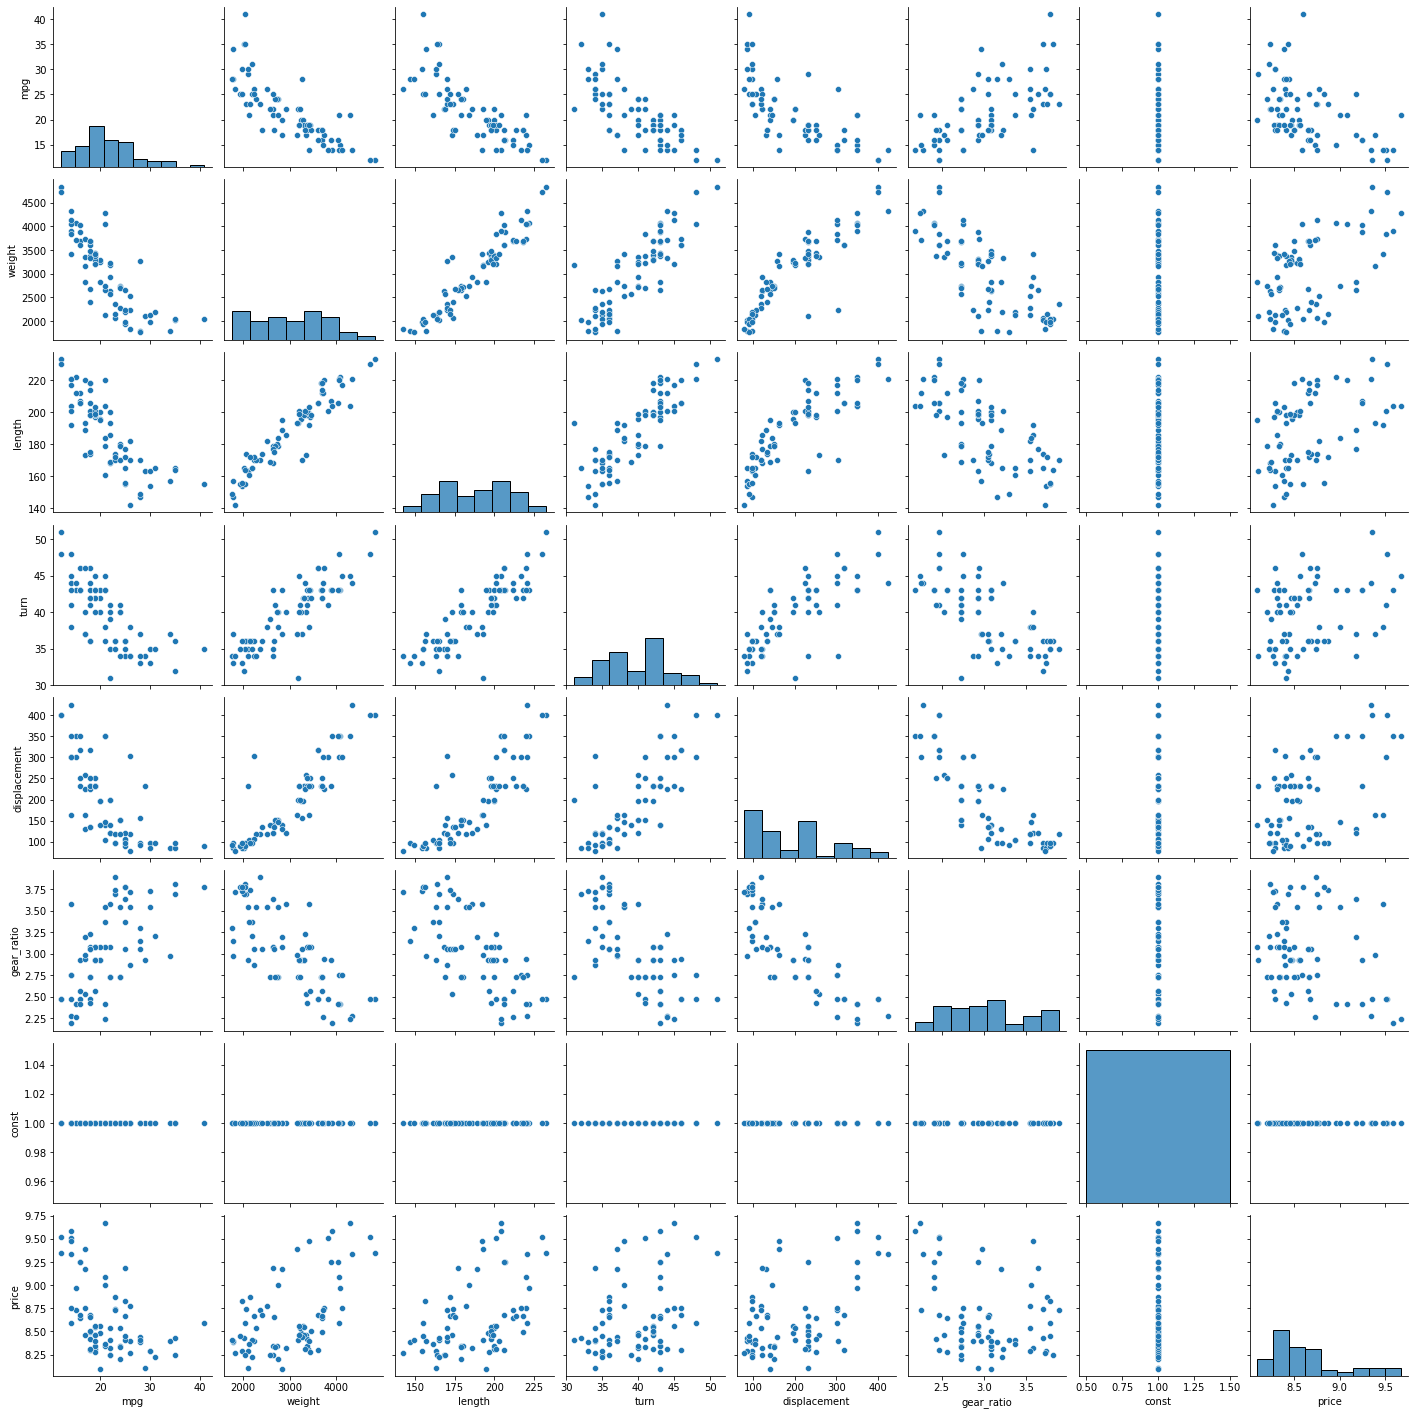

In [ ]:
sns.pairplot(pd.concat((X_new, Y_lg), axis=1))

In [ ]:
sm.stats.diagnostic.het_white(res.resid, X)

(65.95606102874197,
 0.1275216327708524,
 2.8849997863903765,
 0.006662253487923469)

In [ ]:
sm.stats.diagnostic.het_white(res_new.resid, X_new)

(52.61314114563565,
 0.0022403429948425163,
 4.191228082800631,
 9.875470329510247e-06)

In [ ]:
sm.stats.diagnostic.het_goldfeldquandt(Y, X, split=3/8, drop = 10/38)

(0.38856039938490383, 0.9713937907181771, 'increasing')

In [ ]:
sm.stats.diagnostic.het_goldfeldquandt(Y, X_new, split=3/8, drop = 10/38)

(0.38647933851182836, 0.981082497024584, 'increasing')

Говорит, есть гетероскедастичность(

Но т.к. я хз, как конкретно выбирать, где взять логарифм, видимо, придётся потерять чуть баллов и забить(

- По какой метрике вы бы решали, что ваша регрессия улучшилась?

ПРОЦЕДУРА БОКСА КОКСА, потому что логарифмы блин

# №3 (40 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по оценке стоимости недвижимости в стартапе 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Зато они очень хорошо разбираются в бизнесе
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) замечательный датасет. Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть линейной (хотя бы на первых порах, в будущем, после курса по ML, можете брать и нелинейные модели)
    - Во-вторых, ваша цель не просто предсказание цены на ту или иную недвижимости, а **описание механизма ценообразования на рынке**
    - В-третьих, вашей команде очень важно, чтобы результаты модели были адекватными. **За каждой из включенных переменных должна стоять гипотеза о том, почему эта переменная влияет на цену**. Значимость переменной не является достаточным объяснением о включении переменной в конечную модель
- Помните, что это лишь первая версия модели. Основая цель для текущего анализа - это понимание того, 
    - какие данные есть, 
    - как они "выглядят", 
    - какая получается модель, 
    - какие выводы можно сделать, 
    - насколько эти выводы адекватны и соответствуют вашим гипотезам,
    - как можно еще улучшить модель
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (увижу, что явно не прописываете `seed`, если/где надо, поставлю 0 за это задание)
    - Было не стыдно показать CEO и др. в стартапе (если графики будут без подписей осей и названия, как минимум, поставлю 0)

## Решение

In [ ]:
#Прописываю seed, потому что Тимур так сказал
np.random.seed(42)

### Загрузка датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !mkdir /root/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/Kaggle/kaggle.json /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!pip uninstall kaggle
!pip install kaggle

Uninstalling kaggle-1.5.10:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.7/dist-packages/kaggle-1.5.10.dist-info/*
    /usr/local/lib/python3.7/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.10
     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=a17778dd00b0701420e05c388868a2080373f02aad7c26d2ccaa43a27deb0591
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 71.9MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!head data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES


### Исследование данных

Взглянем на данные одним глазком

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Данные немножко разрежены, а я их привык решать связкой `labelEncoding` и бустинга над деревьями. Но мы должны линейно регрессировать, поэтому будем регрессировать.

Правда, регрессировать мы будем не с помощью `statsmodels`, а с помощью старого-доброго `sklearn`, т.к. я знаю, как там делать регуляризацию и кроссвалидацию.

In [ ]:
train_label = train['SalePrice']
train_label.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

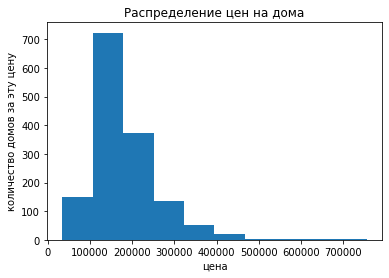

In [ ]:
plt.hist(train_label)
plt.title('Распределение цен на дома')
plt.xlabel('цена')
plt.ylabel('количество домов за эту цену')
plt.show()

Выглядит как очевиднейший логарифм, что в целом понятно: дорогой недвижимости меньше, чем дешёвой

Преобразуем целевую переменную

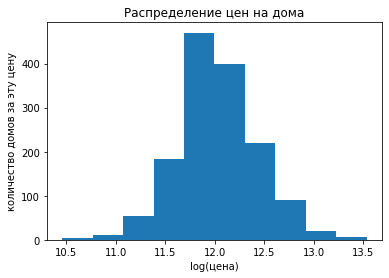

In [ ]:
plt.hist(np.log(train_label))
plt.title('Распределение цен на дома')
plt.xlabel('log(цена)')
plt.ylabel('количество домов за эту цену')
plt.show()

Вот теперь это почти гауссиана, неплохо, оставляем

In [ ]:
train['SalePrice'] = np.log(train['SalePrice'])

Соединим трейн и тест в один датафрейм, чтобы преобразовывать сразу все данные

In [ ]:
data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']), axis=0)

Так-то лучше

Но, т.к. целевая переменная была с тяжёлым хвостом, возможно, существуют переменные с тяжёлым хвостом.

Ребята с Kaggle любезно подобрали нам коэффициент, с которого нам надо брать логарифм от данных.

In [ ]:
from scipy.stats import skew

numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

Осталось только почистить NaNы, но т.к. много переменных, я скрою вывод `data.info`, слишком уж он длинный, а информации в себе несёт мало


In [ ]:
data.info()

Данные разрежены, промежутков немало. Возьмём mean, потому что подсмотрели в соревновании.

Ну и закодируем, конечно.

In [ ]:
data = pd.get_dummies(data)
data = data.fillna(data.mean())
label = train['SalePrice']

train = data[:train.shape[0]]
test = data[train.shape[0]:]

### Построение моделей и выбор лучшей

Тимур чуть-чуть обсуждал регуляризацию, поэтому регуляризуем-ка модель.

Когда данные разрежены и среди них много выбросов, регуляризация очень помогает, потому что мы ищем двойственный минимум ещё и в пространстве признаков.

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    return(np.sqrt(-cross_val_score(model, train, label, scoring="neg_mean_squared_error", cv = 5)))

Сначала попробуем регуляризовать `L2`-регуляризатором, потому что он выпуклый, удобный, красивый и вряд ли мы хотим сразу регуляризоваться конусом, нам больше нравится красивый параболоид.

In [ ]:
alphas = [0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
min(cv_ridge)

0.12717127414701698

Кажется, это неплохой результат (моё экспертное мнение, потому что сравнивать не с чем).

Графичек, потому что все любят графички:

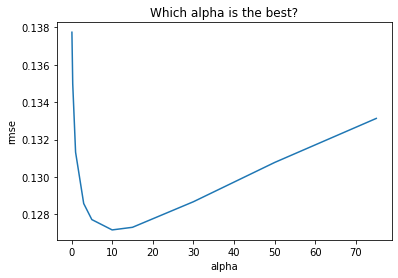

In [ ]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot()

plt.title("Which alpha is the best?")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

Ладно, попробуем регуляризовать конусом, чтобы выкинуть незначимые переменные.

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(train, label)
rmse_cv(model_lasso).mean()

0.1227031948381229

С `L1` модель работает даже лучше.
Теперь посмотрим на признаки модельки и разберёмся, какие вносят наибольший вклад (тут не `feature importance`, как у деревянных моделей, поэтому возьмём модуль).

In [ ]:
coef = pd.Series(model_lasso.coef_, index = train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 108 variables and eliminated the other 180 variables


Лассо-регуляризация, как известно, крута тем, что сама выкидывает ненужные параметры.

### Выводы по признакам

Посмотрим на самые "важные" признаки

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

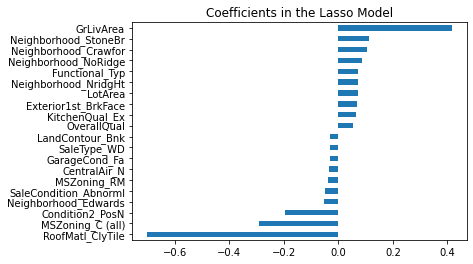

In [ ]:
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [ ]:
print("Наиболее значимые признаки:\n", np.abs(imp_coef))

Наиболее значимые признаки:
 RoofMatl_ClyTile         0.701588
MSZoning_C (all)         0.290834
Condition2_PosN          0.196350
Neighborhood_Edwards     0.053028
SaleCondition_Abnorml    0.048160
MSZoning_RM              0.037847
CentralAir_N             0.035170
GarageCond_Fa            0.031946
SaleType_WD              0.031650
LandContour_Bnk          0.030160
OverallQual              0.053109
KitchenQual_Ex           0.065442
Exterior1st_BrkFace      0.069631
LotArea                  0.071984
Neighborhood_NridgHt     0.072095
Functional_Typ           0.072998
Neighborhood_NoRidge     0.084680
Neighborhood_Crawfor     0.104444
Neighborhood_StoneBr     0.112101
GrLivArea                0.414831
dtype: float64


Как видим, больше всего влияют:

- RoofMatl_ClyTile --- материал крыши (говорят, крышу менять ОЧЕНЬ сложно и дорого),
- MSZoning_C --- каково предназначение дома (коммерческий, жилой, ферма и т.д.),
- Condition2 --- расположены ли поблизости парки, развлекуха и т.д.,
- GrLivArea --- площадь дома,
- Neighborhood --- район в городе,
- LotArea --- размер участка,
- SaleCondition, GarageCond --- состояние дома и гаража,
- CentralAir --- есть ли там воздуховоды для кондиционеров,
- SaleType --- можно ли сэкономить на покупке дома и купить его не за кэш,
- LandContour --- насколько большой уклон участка, 
- Functional --- полностью ли функционируют важные штуки вроде газа, канализации и т.д.,
- Exterior1st --- чем дом обшит,
- KitchenQual --- состояние кухни,
- OverallQual --- экспертная оценка состояния дома.

А вот, кстати, от каких признаков мы брали логарифм изначально, потому что у них были тяжёлые хвосты.

In [ ]:
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

Посмотрим на `residuals plot`, чтобы точно убедиться, что предпосылки Гаусса-Маркова не нарушены.

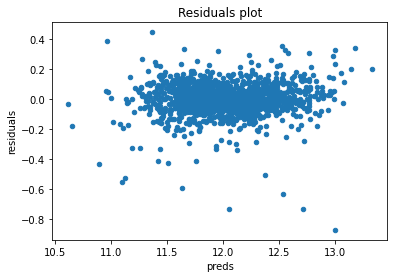

In [ ]:
preds = pd.DataFrame({"preds": model_lasso.predict(train), "true": label})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title('Residuals plot')

plt.show()

Выглядит неплохо, я бы убрал выбросы, но учитывая сколько у нас даты, это необязательно

Сделаем предикты, потому что надо уважить ребят с `kaggle`.

In [ ]:
train_preds = model_lasso.predict(test)

In [ ]:
train_preds

array([11.69278799, 11.92923792, 12.10773438, ..., 12.03209426,
       11.68278819, 12.33187986])